## Visualizations

### 1_MAP

# Map
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 
        


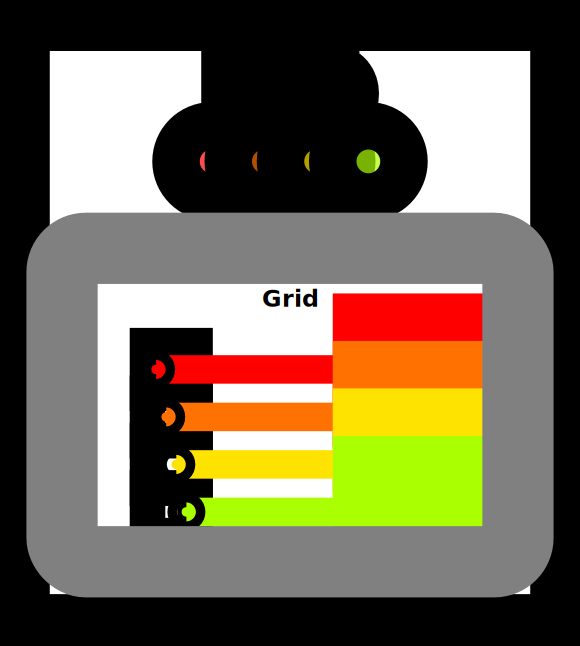

In [4]:
import mlx.core as mx
from utils import MetalKernel, MetalProblem

def map_spec(a: mx.array):
    return a + 10

def map_test(a: mx.array):
    source = """
        uint local_i = thread_position_in_grid.x;
        out[local_i] = a[local_i] + 10;
    """

    kernel = MetalKernel(
        name="map",
        input_names=["a"],
        output_names=["out"],
        source=source,
    )

    return kernel

SIZE = 4
a = mx.arange(SIZE)
output_shape = (SIZE,)

problem = MetalProblem(
    "Map",
    map_test,
    [a], 
    output_shape,
    grid=(SIZE,1,1), 
    spec=map_spec
)

problem.show()

In [5]:
problem.check()

Passed Tests!


### 2_ZIP

# Zip
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             2 |             1 |             0 |             0 | 
        


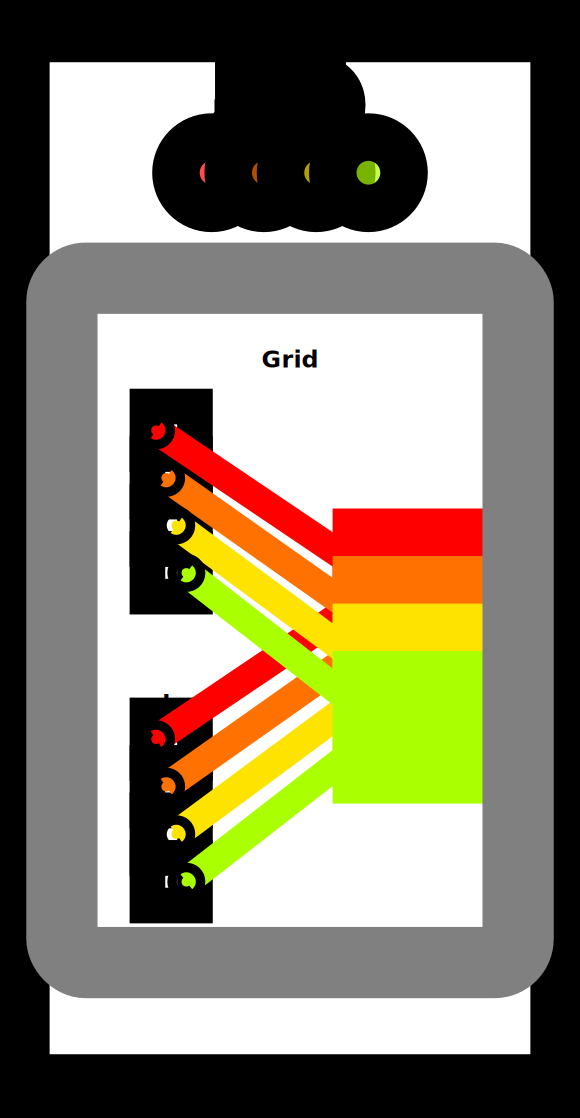

In [6]:
import mlx.core as mx
from utils import MetalKernel, MetalProblem

def zip_spec(a: mx.array, b: mx.array):
    return a + b

def zip_test(a: mx.array, b: mx.array):
    source = """
        uint local_i = thread_position_in_grid.x;
        out[local_i] = a[local_i] + b[local_i];
    """

    kernel = MetalKernel(
        name="zip",
        input_names=["a", "b"],
        output_names=["out"],
        source=source,
    )

    return kernel

SIZE = 4
a = mx.arange(SIZE)
b = mx.arange(SIZE)
output_shapes = (SIZE,)

problem = MetalProblem(
    "Zip",
    zip_test,
    [a, b],
    output_shapes,
    grid=(SIZE,1,1),
    spec=zip_spec
)
problem.show()

In [7]:
problem.check()

Passed Tests!


### 3_GUARD

# Guard
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 
        


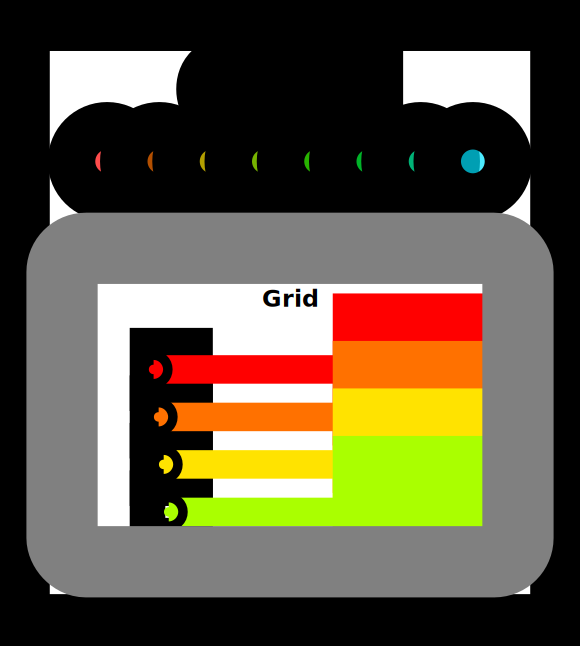

In [9]:
import mlx.core as mx
from utils import MetalKernel, MetalProblem


def map_spec(a: mx.array):
    return a + 10


def map_guard_test(a: mx.array):
    source = """
        uint local_i = thread_position_in_grid.x;
        if (local_i < a_shape[0]) {
            out[local_i] = a[local_i] + 10;
        }
    """

    kernel = MetalKernel(
        name="guard",
        input_names=["a"],
        output_names=["out"],
        source=source,
    )

    return kernel


SIZE = 4
a = mx.arange(SIZE)
output_shape = (SIZE,)

problem = MetalProblem(
    "Guard", map_guard_test, [a], output_shape, grid=(8, 1, 1), spec=map_spec
)
problem.show()

### 4_MAP 2D

# Map 2D
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 
        


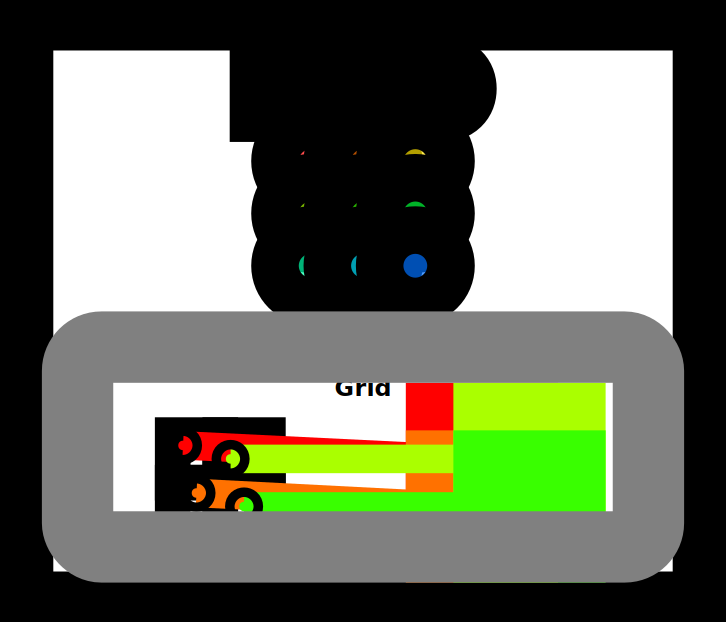

In [13]:
import mlx.core as mx
from utils import MetalKernel, MetalProblem


def map_spec(a: mx.array):
    return a + 10


def map_2D_test(a: mx.array):
    source = """
        uint thread_x = thread_position_in_grid.x;
        uint thread_y = thread_position_in_grid.y;
        uint linear_position = thread_x + thread_y * a_shape[1];
        if (thread_x < a_shape[0] && thread_y < a_shape[1]) {
          out[linear_position] = a[linear_position] + 10;
        }
    """

    kernel = MetalKernel(
        name="map_2D",
        input_names=["a"],
        output_names=["out"],
        source=source,
    )

    return kernel


SIZE = 2
a = mx.arange(SIZE * SIZE).reshape((SIZE, SIZE))
output_shape = (SIZE, SIZE)

problem = MetalProblem(
    "Map 2D", map_2D_test, [a], output_shape, grid=(3, 3, 1), spec=map_spec
)
problem.show()

### 5_BROADCAST

# Broadcast
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             2 |             1 |             0 |             0 | 
        


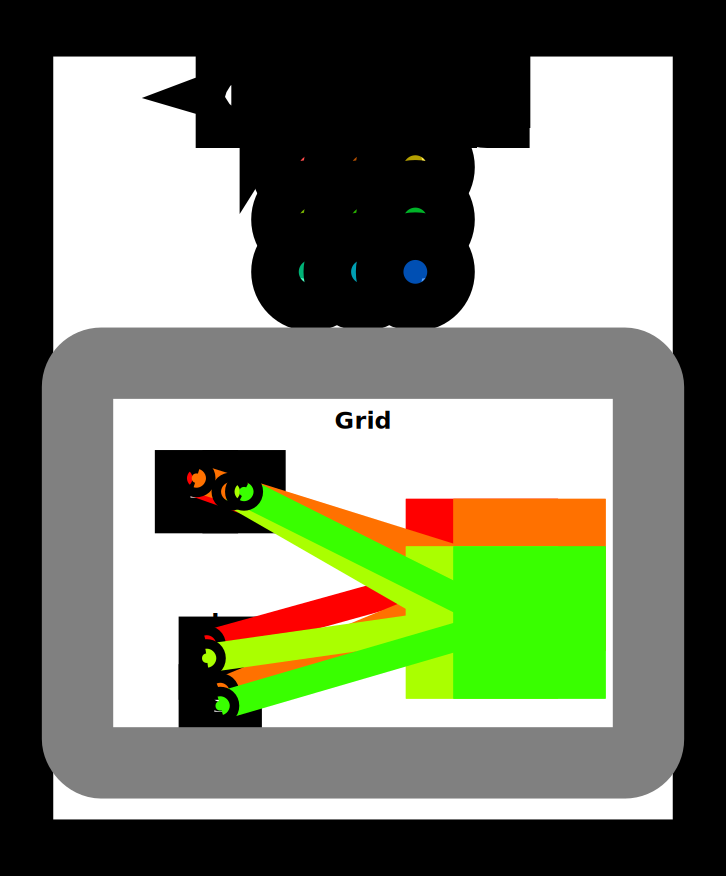

In [14]:
import mlx.core as mx
from utils import MetalKernel, MetalProblem


def zip_spec(a: mx.array, b: mx.array):
    return a + b


def broadcast_test(a: mx.array, b: mx.array):
    source = """
        uint thread_x = thread_position_in_grid.x;
        uint thread_y = thread_position_in_grid.y;
        uint broadcasted_size_x = max(a_shape[0], b_shape[0]);
        uint broadcasted_size_y = max(a_shape[1], b_shape[1]);

        if (thread_x < broadcasted_size_x && thread_y < broadcasted_size_y) {
            out[thread_x * broadcasted_size_x + thread_y] = a[0 + thread_y] + b[thread_x + 0];
        }
    """

    kernel = MetalKernel(
        name="broadcast",
        input_names=["a", "b"],
        output_names=["out"],
        source=source,
    )

    return kernel


SIZE = 2
a = mx.arange(SIZE).reshape(SIZE, 1)
b = mx.arange(SIZE).reshape(1, SIZE)
output_shape = (SIZE, SIZE)

problem = MetalProblem(
    "Broadcast", broadcast_test, [a, b], output_shape, grid=(3, 3, 1), spec=zip_spec
)
problem.show()

### 6_THREADGROUPS

# Threadgroups
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 
        


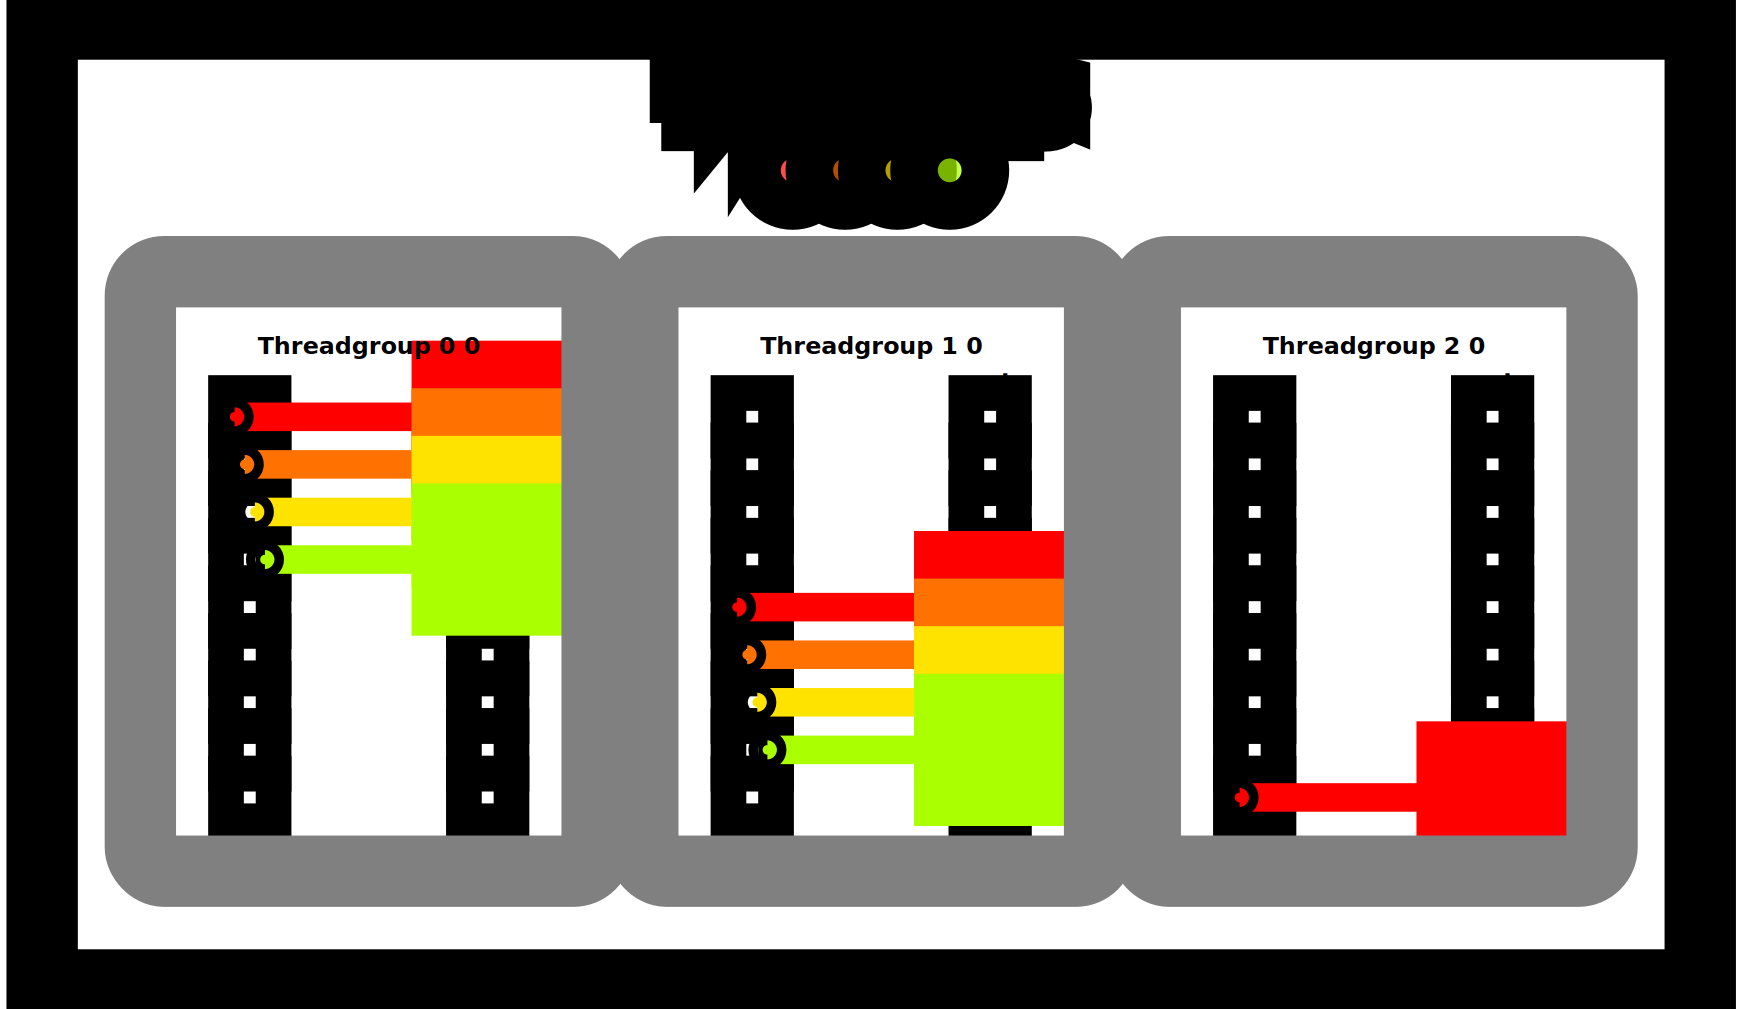

In [1]:
import mlx.core as mx
from utils import MetalKernel, MetalProblem


def map_spec(a: mx.array):
    return a + 10


def map_threadgroup_test(a: mx.array):
    source = """
        uint i = threadgroup_position_in_grid.x * threads_per_threadgroup.x + thread_position_in_threadgroup.x;
        if (i < a_shape[0]) {
            out[i] = a[i] + 10;
        }
    """

    kernel = MetalKernel(
        name="threadgroups",
        input_names=["a"],
        output_names=["out"],
        source=source,
    )

    return kernel


SIZE = 9
a = mx.arange(SIZE)
output_shape = (SIZE,)

problem = MetalProblem(
    "Threadgroups",
    map_threadgroup_test,
    [a],
    output_shape,
    grid=(12, 1, 1),
    threadgroup=(4, 1, 1),
    spec=map_spec,
)
problem.show()

In [2]:
problem.check()

Passed Tests!


### 7_THREADGROUPS 2D

# Threadgroups 2D
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 
        


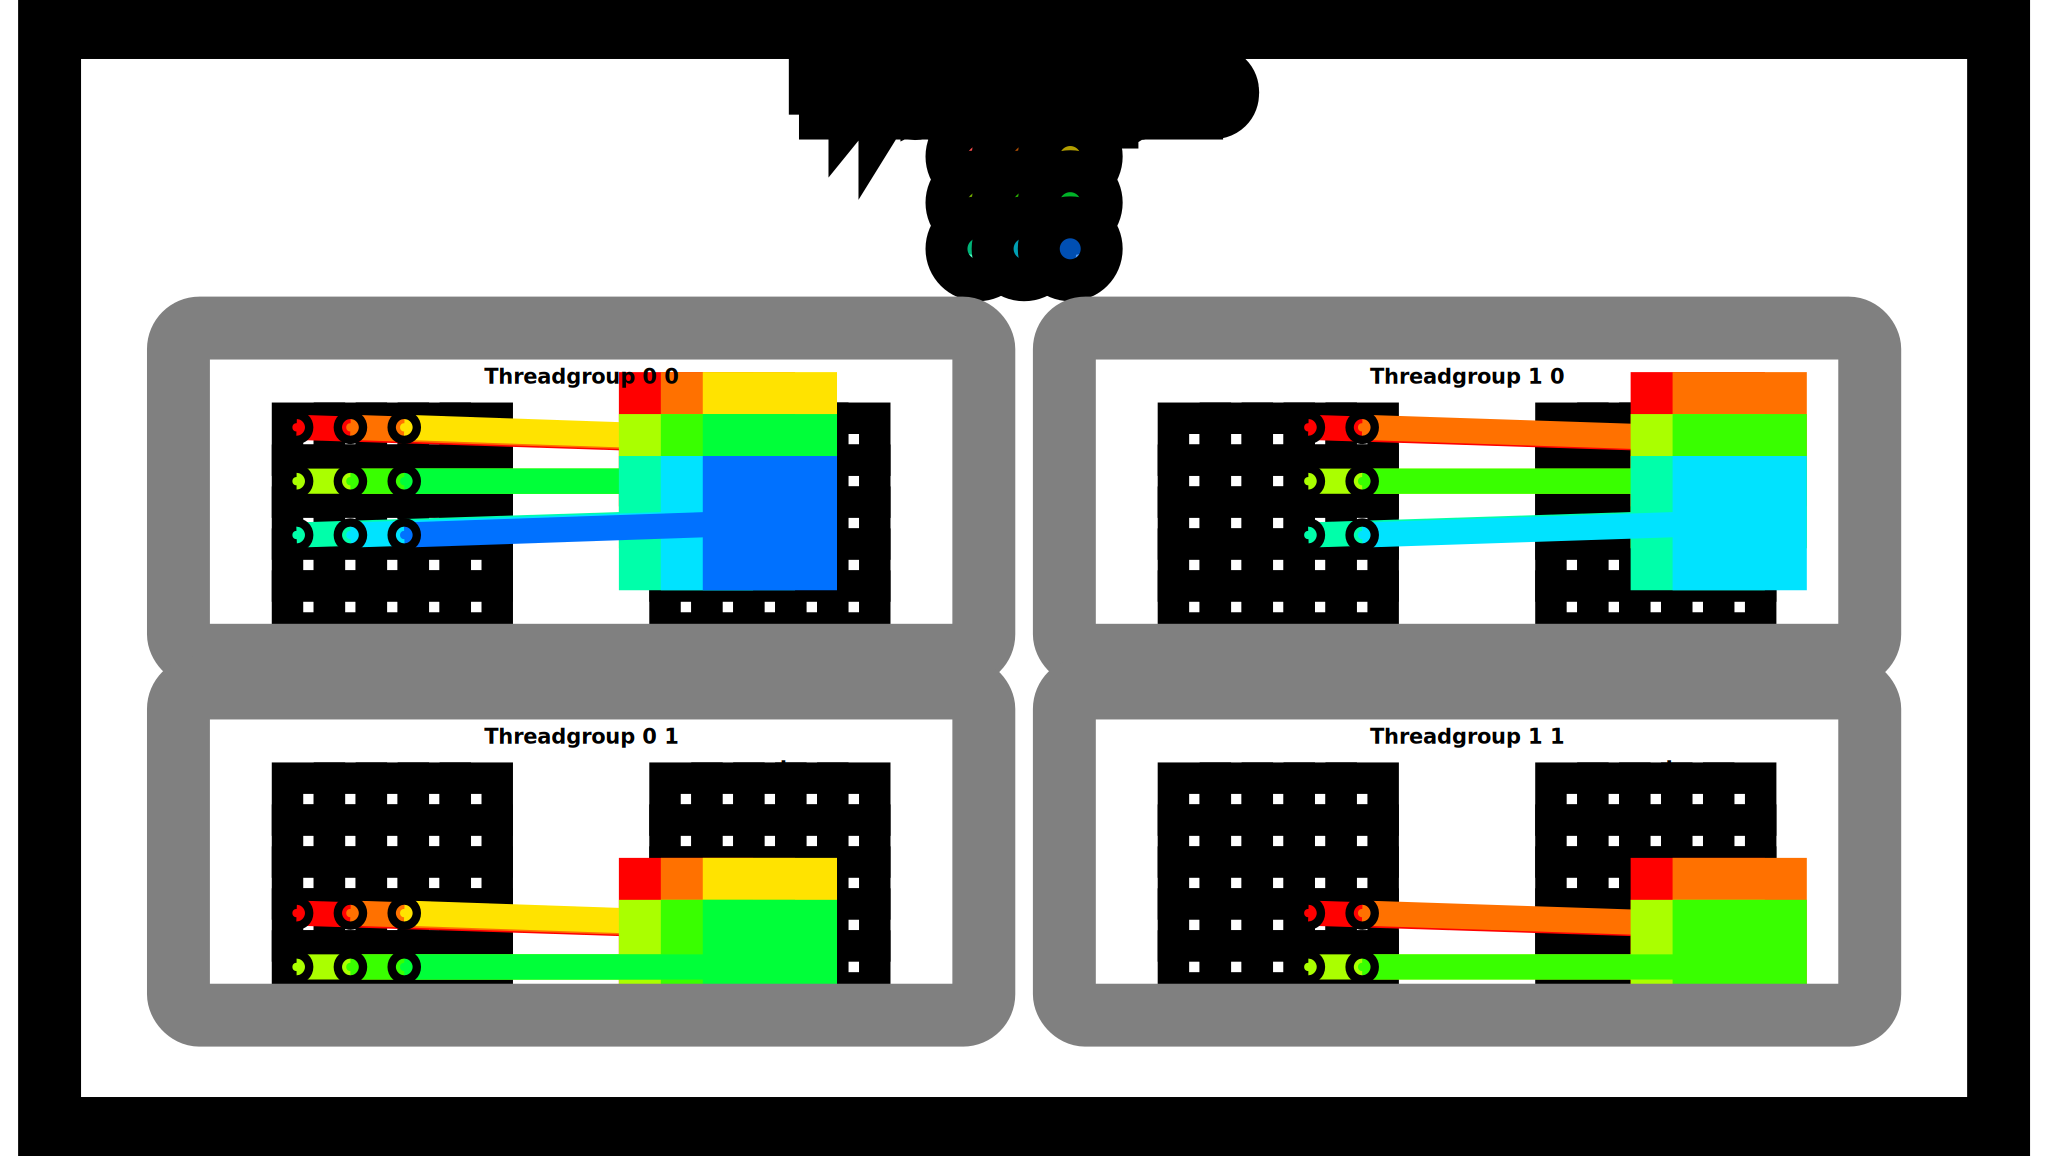

In [2]:
import mlx.core as mx
from utils import MetalProblem, MetalKernel


def map_spec(a: mx.array):
    return a + 10


def map_threadgroup_2D_test(a: mx.array):
    source = """
        uint i = threadgroup_position_in_grid.x * threads_per_threadgroup.x + thread_position_in_threadgroup.x;
        uint j = threadgroup_position_in_grid.y * threads_per_threadgroup.y + thread_position_in_threadgroup.y;
        
        if (i < a_shape[0] && j < a_shape[1]) {
            out[i * a_shape[1] + j] = a[i * a_shape[1] +
                j] + 10;
        }
    """

    kernel = MetalKernel(
        name="threadgroups_2D",
        input_names=["a"],
        output_names=["out"],
        source=source,
    )

    return kernel


SIZE = 5
a = mx.ones((SIZE, SIZE))
output_shape = (SIZE, SIZE)

problem = MetalProblem(
    "Threadgroups 2D",
    map_threadgroup_2D_test,
    [a],
    output_shape,
    grid=(6, 6, 1),
    threadgroup=(3, 3, 1),
    spec=map_spec,
)
problem.show()

### 8_THREAD MEMORY

# Threadgroup Memory
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             1 |             1 | 
        


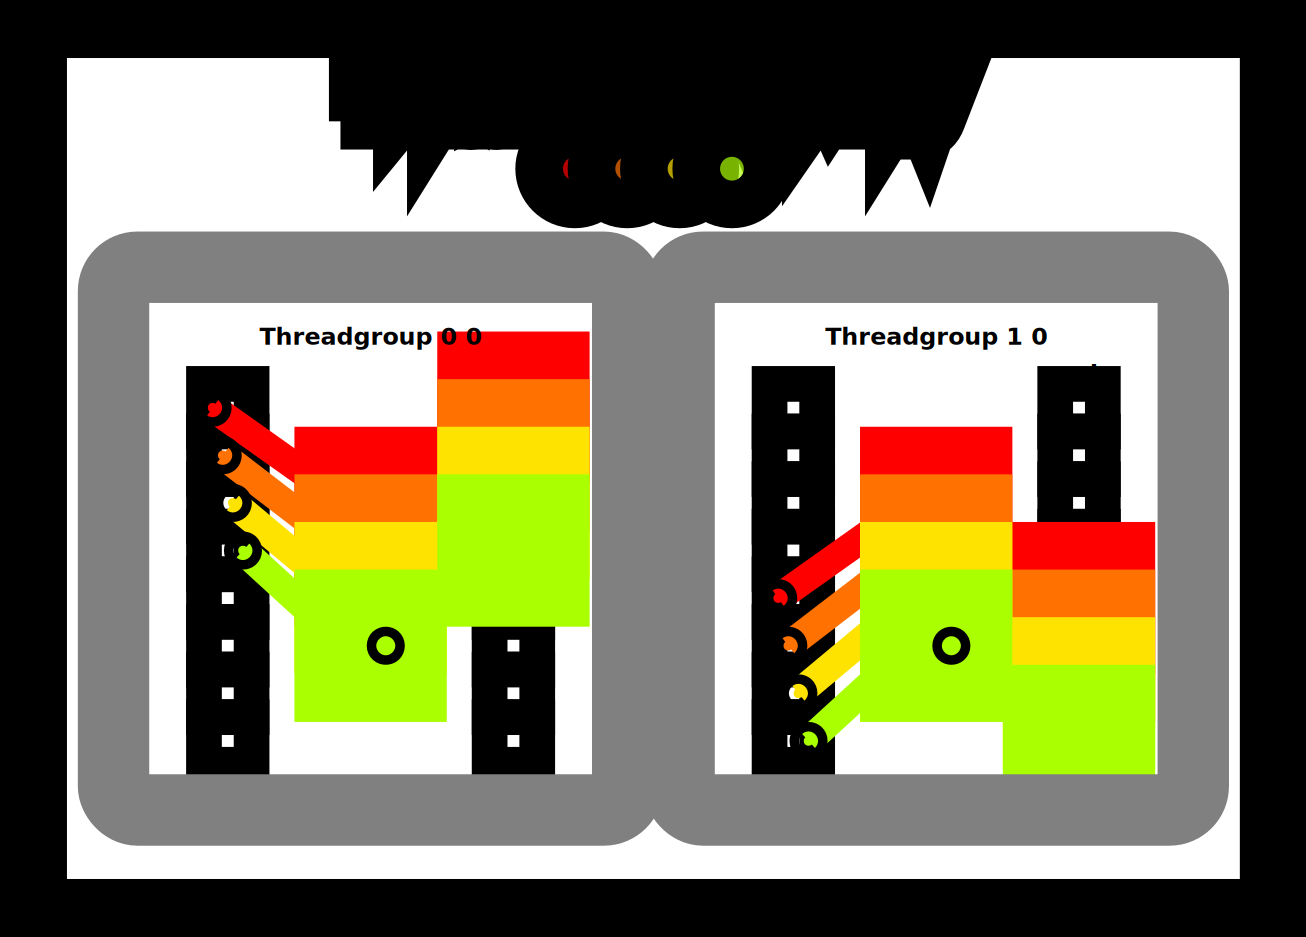

In [2]:
import mlx.core as mx
from utils import MetalKernel, MetalProblem


def map_spec(a: mx.array):
    return a + 10


def shared_test(a: mx.array):
    header = """
        constant uint THREADGROUP_MEM_SIZE = 4;
    """

    source = """
        threadgroup float shared[THREADGROUP_MEM_SIZE];
        uint i = threadgroup_position_in_grid.x * threads_per_threadgroup.x + thread_position_in_threadgroup.x;
        uint local_i = thread_position_in_threadgroup.x;

        if (i < a_shape[0]) {
            shared[local_i] = a[i];
            threadgroup_barrier(mem_flags::mem_threadgroup);
        }

        out[i] = shared[local_i] + 10;
    """

    kernel = MetalKernel(
        name="threadgroup_memory",
        input_names=["a"],
        output_names=["out"],
        header=header,
        source=source,
    )

    return kernel


SIZE = 8
a = mx.ones(SIZE)
output_shape = (SIZE,)

problem = MetalProblem(
    "Threadgroup Memory",
    shared_test,
    [a],
    output_shape,
    grid=(SIZE, 1, 1),
    threadgroup=(4, 1, 1),
    spec=map_spec,
)
problem.show()